# **Telecom Churn Case Study**

**Problem statement** - In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, `customer retention has now become even more important than customer acquisition`.

## Importing required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Importing Scikit Libraries

In [2]:
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, \
                            auc, roc_auc_score, roc_curve, recall_score,\
                            accuracy_score

# PCA libraries
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

## Load dataset

In [3]:
# Load the dataset
churn_df = pd.read_csv('telecom_churn_data.csv')

In [4]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [7]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


After describing and taking a look at the columns, we observe that there exist some columns with missing value and zeroes. We will clean this data before proceeding with model building.

## **1. Data Cleaning**

### **1.1 Check for Null Values**

In [8]:
# check for percentage of null values
null_count_col = round(churn_df.isnull().sum() * 100/len(churn_df.index),2).sort_values(ascending=False)
null_count_col[null_count_col>0]

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

We can observe some of the features are repeated for each month. These are also the features with null values. We will analyse these columns and find an appropriate value to impute with. We will segregate these columns into Date columns and Categorical and numerical columns

### **1.2 Segregating columns into Date, Categorical and Numerical columns**

#### a. Date columns

In [9]:
# Function to drop columns
def drop_columns(drop_col_list):
    churn_df.drop(drop_col_list, axis=1, inplace=True)

In [10]:
# Get all data columns
date_cols = [feature for feature in churn_df.select_dtypes(['object']).columns]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [11]:
# check for percentage of null values
date_cols = round(churn_df[date_cols].isnull().sum() * 100/len(churn_df[date_cols].index),2).sort_values(ascending=False)
date_cols

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
last_date_of_month_8         1.10
last_date_of_month_7         0.60
last_date_of_month_6         0.00
dtype: float64

We observe that date of recharge data column has large number of missing values. We will drop these columns later.

#### b. Categorical columns

We observe that some of the columns are boolean columns. However they already have two values to denote True and False (1 and 0). We will check if there are any missing values in these columns

In [12]:
cat_cols = [
        'night_pck_user_6','fb_user_6', #6th month
        'night_pck_user_7','fb_user_7', #7th month
        'night_pck_user_8','fb_user_8', #8th month
        'night_pck_user_9','fb_user_9', #9th month
    ]

In [13]:
# check for percentage of null values
cat_cols = round(churn_df[cat_cols].isnull().sum() * 100/len(churn_df[cat_cols].index),2).sort_values(ascending=False)
cat_cols

fb_user_6           74.85
night_pck_user_6    74.85
fb_user_7           74.43
night_pck_user_7    74.43
fb_user_9           74.08
night_pck_user_9    74.08
fb_user_8           73.66
night_pck_user_8    73.66
dtype: float64

Since `Night pack user` and `Facebook user` columns are catgorical columns, If the user is not a night pack user or not a facebook user we'll impute such columns with `-1` to denote a seperate category.

In [14]:
# impute night pack user and facebook user columns with -1 to indicate seperate category.
churn_df[cat_cols.keys()] = churn_df[cat_cols.keys()].fillna(-1)

In [15]:
churn_df[cat_cols.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fb_user_6         99999 non-null  float64
 1   night_pck_user_6  99999 non-null  float64
 2   fb_user_7         99999 non-null  float64
 3   night_pck_user_7  99999 non-null  float64
 4   fb_user_9         99999 non-null  float64
 5   night_pck_user_9  99999 non-null  float64
 6   fb_user_8         99999 non-null  float64
 7   night_pck_user_8  99999 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


#### c. Numerical columns

In [16]:
# Get all categorical Basement columns
numerical_cols = [feature for feature in churn_df.select_dtypes(['int', 'float']).columns if feature not in cat_cols]
numerical_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [17]:
# Get all numerical recharge columns
recharge_cols = [feature for feature in churn_df[numerical_cols] if 'rech' in feature]
recharge_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

### **1.3 Drop columns**

- Drop all the Id columns - `mobile_number, circle_id`. 
- Drop all date columns since months June, July, August and September are encoded as 6, 7, 8 and 9, respectively.


#### a. Drop Id and Date columns

In [18]:
# check for count of unique values
churn_df.nunique().sort_values(ascending=False)

mobile_number               99999
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
total_og_mou_7              40477
total_og_mou_6              40327
total_og_mou_8              40074
total_og_mou_9              39160
total_ic_mou_6              32247
total_ic_mou_7              32242
total_ic_mou_8              32128
total_ic_mou_9              31260
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
loc_ic_mou_6                28569
loc_ic_mou_7                28390
loc_ic_mou_8                28200
std_og_mou_7                27951
loc_ic_mou_9                27697
std_og_mou_6                27502
std_og_mou_8                27491
std_og_mou_9                26553
loc_og_mou_6                26372
loc_og_mou_7                26091
loc_og_mou_8                25990
loc_og_mou_9                25376
onnet_mou_7   

In [19]:
print(f'Dataset size before column drop: {churn_df.shape}')

Dataset size before column drop: (99999, 226)


In [20]:
id_col = ['mobile_number', 'circle_id']
drop_columns(id_col)

In [21]:
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 224)


#### b. Drop Date column

Drop `date_of_last_rech_data` as they are last date of mobile data recharge with more than 70% missing data.

In [22]:
date_col = [
    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',    # last date of month
    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_9', 'date_of_last_rech_data_8'   # date of last data rech 
]

In [23]:
print(f'Dataset size before column drop: {churn_df.shape}')

Dataset size before column drop: (99999, 224)


In [24]:
drop_columns(date_col)

In [25]:
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 216)


#### c. Drop columns with no variance

We have successfully treated all the null columns in our dataset. Now let's look at the columns with low variance.

In [26]:
unique_count = churn_df.nunique().sort_values(ascending=False)
one_unique_cols = unique_count[unique_count==1]
one_unique_cols

loc_ic_t2o_mou      1
std_og_t2o_mou      1
std_ic_t2o_mou_6    1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_og_t2c_mou_9    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_9    1
loc_og_t2o_mou      1
dtype: int64

In [27]:
# lets describe these columns for more information
churn_df[one_unique_cols.keys()].describe()

,loc_ic_t2o_mou,std_og_t2o_mou,std_ic_t2o_mou_6,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,loc_og_t2o_mou
count,98981.0,98981.0,96062.0,96062.0,96140.0,94621.0,92254.0,96140.0,94621.0,92254.0,98981.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print(f'Number of columns to drop {len(one_unique_cols.keys())}')

Number of columns to drop 11


In [29]:
# We observe that these columns have either 0 or null values. There is no variance in these columns. Hence we drop them
drop_columns(one_unique_cols.keys())
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 205)


#### d. Drop count_rech_2g and count_rech_3g columns

Let us look at the total recharge column. We observe that it is the addition of 2g and 3g recharge.

In [30]:
churn_df[['total_rech_data_6','count_rech_2g_6', 'count_rech_3g_6']].sample(5)

,total_rech_data_6,count_rech_2g_6,count_rech_3g_6
9463,NaN,NaN,NaN
17672,NaN,NaN,NaN
57996,2.0,2.0,0.0
98495,3.0,0.0,3.0
11815,NaN,NaN,NaN


- `total_rech_data` column give total count of mobile internet recharge.

  `total_rech_data = count_rech_2g + count_rech_3g` 
  
  So we will drop `count_rech_2g and count_rech_3g` column for all months

In [31]:
# dropping 2g and 3g data recharge columns
count_rech = [
     'count_rech_2g_6', 'count_rech_3g_6',   # 6th month
     'count_rech_2g_7', 'count_rech_3g_7',   # 7th month
     'count_rech_2g_8', 'count_rech_3g_8',   # 8th month
     'count_rech_2g_9', 'count_rech_3g_9'    # 9th month
 ]
drop_columns(count_rech)

In [32]:
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 197)


### **1.4 Impute columns**

#### a. Impute Data and Recharge columns
count_rech_2g_6 and count_rech_3g_6 is Count of 2G and 3g recharges done for month of July. Since the value is missing, we assume that the customer has done 0 recharges.  Similarly we have columns for other months also. Thus we will impute the missing values with 0. 
`max_rech_data_6, total_rech_data_6` is the amount of data and `av_rech_amt_data_6','total_rech_amt_6` is the cost of recharge. Both these values can be imputed as 0 as well.

In [33]:
# Get all numerical recharge columns
numerical_cols = [feature for feature in churn_df.select_dtypes(['int', 'float']).columns if feature not in cat_cols]
recharge_cols = [feature for feature in churn_df[numerical_cols] if 'rech' in feature]
recharge_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [34]:
# imputing recharge columns with 0
churn_df[recharge_cols] = churn_df[recharge_cols].fillna(0)

In [35]:
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 197)


#### b. Impute ARPU columns
ARPU is average revenue per user. Missing values mean there was no revenue generated. Hence we impute such columns with 0 as well - `arpu_2g_6, arpu_3g_6`. 

In [36]:
# List of columns with "arpu" attribute
arpu_col = churn_df.filter(regex='arpu', axis=1).columns
print("List of columns with 'arpu' attribute:\n\n", arpu_col)

List of columns with 'arpu' attribute:

 Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')


In [37]:
churn_df[arpu_col] = churn_df[arpu_col].fillna(0)

#### c. Imputing MOU

In [38]:
# check for percentage of null values.
null_count_cols = round(churn_df.isnull().sum() * 100/len(churn_df.index),2).sort_values(ascending=False)
null_count_cols = null_count_cols[null_count_cols>0]
null_count_cols

spl_ic_mou_9           7.75
loc_ic_t2t_mou_9       7.75
loc_og_mou_9           7.75
std_og_t2m_mou_9       7.75
std_og_t2f_mou_9       7.75
loc_og_t2c_mou_9       7.75
std_og_mou_9           7.75
isd_og_mou_9           7.75
loc_og_t2f_mou_9       7.75
spl_og_mou_9           7.75
loc_og_t2m_mou_9       7.75
og_others_9            7.75
ic_others_9            7.75
loc_og_t2t_mou_9       7.75
isd_ic_mou_9           7.75
roam_og_mou_9          7.75
std_og_t2t_mou_9       7.75
roam_ic_mou_9          7.75
offnet_mou_9           7.75
loc_ic_t2m_mou_9       7.75
loc_ic_t2f_mou_9       7.75
loc_ic_mou_9           7.75
onnet_mou_9            7.75
std_ic_t2m_mou_9       7.75
std_ic_t2t_mou_9       7.75
std_ic_t2f_mou_9       7.75
std_ic_mou_9           7.75
ic_others_8            5.38
std_og_t2m_mou_8       5.38
spl_ic_mou_8           5.38
loc_ic_t2f_mou_8       5.38
std_og_t2f_mou_8       5.38
loc_ic_mou_8           5.38
std_og_mou_8           5.38
std_og_t2t_mou_8       5.38
std_ic_t2t_mou_8    

Most of the columns are mou columns. MOU stands for minutes of usage. We assume that these columns had no usage at all. Thus, we impute all these columns with 0.

In [39]:
# List of columns with "mou" attribute
mou_col = churn_df.filter(regex='mou', axis=1).columns
print("List of columns with 'mou' attribute: \n\n", mou_col)

List of columns with 'mou' attribute: 

 Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9'],
      dtype='object', length=108)


In [40]:
churn_df[mou_col] = churn_df[mou_col].fillna(0)

#### d. Imputing Incoming and Outgoing others

In [41]:
# check for percentage of null values greater than 0 percent.
null_count_cols = round(churn_df.isnull().sum() * 100/len(churn_df.index),2).sort_values(ascending=False)
null_count_cols = null_count_cols[null_count_cols>0]
null_count_cols

ic_others_9            7.75
og_others_9            7.75
ic_others_8            5.38
og_others_8            5.38
date_of_last_rech_9    4.76
ic_others_6            3.94
og_others_6            3.94
ic_others_7            3.86
og_others_7            3.86
date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
date_of_last_rech_6    1.61
dtype: float64

`ic` and `og` are incoming and outgoing. These columns will also be measured in munutes. We assume that there were 0 minutes spent for missing values of these fields.

In [42]:
# List of columns to impute with zero
impute_cols = [
    'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9',
    'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9'
]

churn_df[impute_cols] = churn_df[impute_cols].fillna(0)

In [43]:
# check for percentage of null values greater than 0 percent.
null_count_cols = round(churn_df.isnull().sum() * 100/len(churn_df.index),2).sort_values(ascending=False)
null_count_cols = null_count_cols[null_count_cols>0]
null_count_cols

date_of_last_rech_9    4.76
date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
date_of_last_rech_6    1.61
dtype: float64

We will use `date of recharge` columns to derieve the gap between last recharges and then drop the columns.

Now we will proceed to derieve more information from the existing columns.

## **2. Derive new features**

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### 2.1 Calculate total recharge amount  in June and July.
Total amount is calculated as follow:
- call recharge amount (`total_rech_amt`) + data recharge amount (`total_rech_data_6 * av_rech_amt_data`)

#### a. Calculate Total amount for HVC and LVC

In [44]:
# High-value customers from month 6 (June) and 7 (July)
churn_df['total_rech_amt_call_data_6'] = (
        (churn_df['total_rech_data_6'] * churn_df['av_rech_amt_data_6']) +  churn_df['total_rech_amt_6']
)

churn_df['total_rech_amt_call_data_7'] = (
        (churn_df['total_rech_data_7'] * churn_df['av_rech_amt_data_7']) +  churn_df['total_rech_amt_7']
)

In [45]:
# Low-value customers from month 8 (August)
churn_df['total_rech_amt_call_data_8'] = (
        (churn_df['total_rech_data_8'] * churn_df['av_rech_amt_data_8']) +  churn_df['total_rech_amt_8']
)

In [46]:
churn_df[['total_rech_amt_call_data_6', 'total_rech_amt_call_data_7', 'total_rech_amt_call_data_8']].head()

,total_rech_amt_call_data_6,total_rech_amt_call_data_7,total_rech_amt_call_data_8
0,614.0,504.0,504.0
1,74.0,538.0,383.0
2,168.0,315.0,116.0
3,230.0,310.0,601.0
4,252.0,350.0,287.0


#### b. Average recharge done by HVC in June and July

In [47]:
# calculate average of June and July
churn_df['av_rech_amt_call_data_6_7'] = np.round((churn_df['total_rech_amt_call_data_6'] + churn_df['total_rech_amt_call_data_7']),2)/2

In [48]:
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 201)


#### c. Average recharge done by LVC in August

In [49]:
churn_df['av_rech_amt_call_data_8'] = churn_df['total_rech_amt_call_data_8']

In [50]:
churn_df[['av_rech_amt_call_data_6_7', 'av_rech_amt_call_data_8']].head()

,av_rech_amt_call_data_6_7,av_rech_amt_call_data_8
0,559.0,504.0
1,306.0,383.0
2,241.5,116.0
3,270.0,601.0
4,301.0,287.0


In [51]:
drop_rech_data_col = [
    'total_rech_data_6','av_rech_amt_data_6','total_rech_amt_6',   # 6th month
    'total_rech_data_7','av_rech_amt_data_7','total_rech_amt_7',   # 7th month
    'total_rech_data_8','av_rech_amt_data_8','total_rech_amt_8',   # 8th month
    'total_rech_amt_call_data_6', 'total_rech_amt_call_data_7', 'total_rech_amt_call_data_8'   #6,7,8th month
]

Since we have derieved Average of recharge amount data for 6th 7th month and 8th, we will drop these columns. 

In [52]:
drop_columns(drop_rech_data_col)
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 190)


### 2.2 Convert `AON` in months
As per data dictionary `AON is Age on network - number of days the customer is using the operator T network`. To find the number of months, we will divide by 30.

In [53]:
churn_df['aon_month'] = churn_df['aon'] / 30

In [54]:
# Drop AON since we have Age on network in months
drop_columns(['aon'])

### 2.3 Derive last recharge gap

In [55]:
# Convert to datetime format
churn_df['date_of_last_rech_6'] = pd.to_datetime(churn_df['date_of_last_rech_6'], format='%m/%d/%Y')
churn_df['date_of_last_rech_7'] = pd.to_datetime(churn_df['date_of_last_rech_7'], format='%m/%d/%Y')
churn_df['date_of_last_rech_8'] = pd.to_datetime(churn_df['date_of_last_rech_8'], format='%m/%d/%Y')

In [56]:
# function to calculate last recharge difference
def rech_age_gap(date_col_list):
    for i in range(1, len(date_col_list)):
        rech_gap = np.where(
            churn_df[date_col_list[i]].notna() & churn_df[date_col_list[i-1]].notna(), 
            ( churn_df[date_col_list[i]] - churn_df[date_col_list[i-1]] ).dt.days, 0
        )

        churn_df[f'last_rech_age_gap_{i}'] = rech_gap


In [57]:
date_col_list = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

# call function
rech_age_gap(date_col_list)

In [58]:
churn_df[churn_df.filter(regex='last_rech_age_gap_').columns].head()

,last_rech_age_gap_1,last_rech_age_gap_2
0,25.0,23.0
1,32.0,28.0
2,37.0,21.0
3,33.0,31.0
4,32.0,12.0


Since we've drieved new columns, we will drop the previous columns which had missing values

In [59]:
# drop date columns
drop_columns(date_col_list)
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (99999, 189)


### 2.4 Derive features from good phase months

First two months are the `good` phase, the third month is the `action` phase, while the fourth month is the `churn` phase.

- The `good` phase: In this phase, the customer is happy with the service and behaves as usual.
- The `action` phase: In this phase, the customer usually shows different behaviour than the ‘good’ months
- The `churn` phase: In this phase, the customer is said to have churned.

In [60]:
col_list = churn_df.filter(regex='_6').columns.str[:-2]
col_list = list(col_list)
col_list

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'max_rech_amt',
 'last_day_rch_amt',
 'max_rech_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'av_rech_amt_call_data_6']

In [61]:
# since we have already taken average of 6th and 7th month in the derieved column, 
# we will remove this column from the list
col_list.remove('av_rech_amt_call_data_6')

In [62]:
print("Shape of dataset before deriving new features", churn_df.shape)

Shape of dataset before deriving new features (99999, 189)


In [63]:
for col in col_list:
    churn_df[f'{col}_diff'] = churn_df[f'{col}_8'] - ((churn_df[f'{col}_6'] + churn_df[f'{col}_7']) / 2)

In [64]:
print("Shape of dataset after deriving new features", churn_df.shape)

Shape of dataset after deriving new features (99999, 233)


## **3. Filter high-value customers**

Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months 

In [65]:
# 70th percentile of the average recharge amount
churn_df['av_rech_amt_call_data_6_7'].quantile(0.70)

478.0

In [66]:
churn_df = churn_df[
    churn_df['av_rech_amt_call_data_6_7'] >= churn_df['av_rech_amt_call_data_6_7'].quantile(0.70)
].reset_index(drop=True)

In [67]:
churn_df.shape

(30001, 233)

## **4. Tag churners and remove attributes of the churn phase**

### 4.1 Tag churners 

Now tag the churned customers (churn=1, else 0) based on the fourth month (9 - September) as follows: 

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [68]:
churn_df['target'] = (
    churn_df[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0
).astype(int)

### 4.2 Remove attributes of churner

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [69]:
# get list of columns having attributes _9
columns_9 = []
columns_9 = churn_df.filter(regex='_9').columns
print(columns_9)
print("---"*20)
print("Columns count", len(columns_9))

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9',
       'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9'],
      dtype='object')
----------------------------------

In [70]:
print(f'Dataset size before column drop: {churn_df.shape}')

Dataset size before column drop: (30001, 234)


`sep_vbc_3g` this column gives information about `vbc` from 9th month (September).

In [71]:
drop_columns(['sep_vbc_3g'])

In [72]:
drop_columns(columns_9)
print(f'Dataset size after column drop: {churn_df.shape}')

Dataset size after column drop: (30001, 185)


In [73]:
churn_df.shape

(30001, 185)

<AxesSubplot:ylabel='target'>

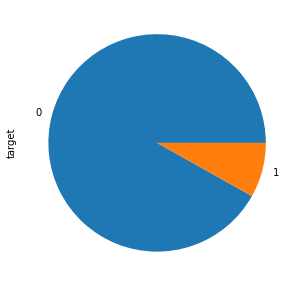

In [74]:
(churn_df['target'].value_counts(normalize=True)*100).plot(kind='pie', figsize=(5, 5))

In [75]:
churn = (np.sum(churn_df['target'])/len(churn_df['target'].index))*100
print(f'Churn Rate: {np.round(churn,2)}%')

Churn Rate: 8.14%


## **5. EDA**

In [76]:
# function to plot bar chart
def plot_mean_bar_chart(col_list):
    mean_data = churn_df.groupby('target')[col_list].mean().T
    mean_data.plot.bar(figsize=(10,5))
    plt.xticks(rotation=0)
    plt.legend(["Non Churn", "Churn"])
    plt.show()
    
    return mean_data.T

#### **1. Average Revenue Per User (ARPU)**
- As per data dictionary `ARPU is Average revenue per user`

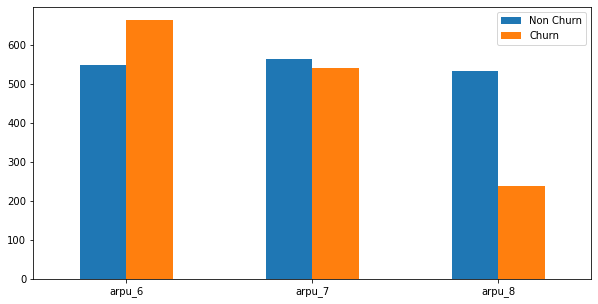

,arpu_6,arpu_7,arpu_8
target,,,
0,549.220390,562.608191,532.635710
1,663.158246,540.165968,237.200793


In [77]:
arpu_cols = churn_df.filter(regex='arpu').columns
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8']
plot_mean_bar_chart(arpu_cols)

- We can see that there is drop for ARPU in 8th month for churn users

#### **2. Monthly service (MONTHLY)**
- As per data dictionary `MONTHLY is Service schemes with validity equivalent to a month`

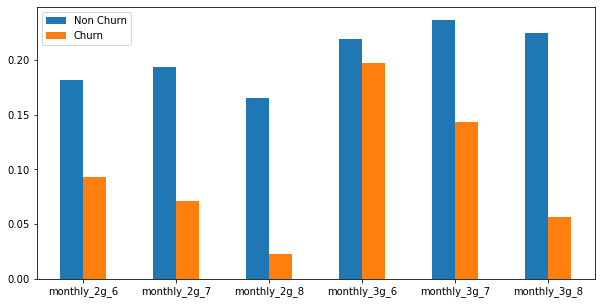

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
target,,,,,,
0,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
1,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


In [78]:
monthly_cols = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
                'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
plot_mean_bar_chart(monthly_cols)

- We can see that there is drop for 2g and 3g MONTHLY subscription in 8th month for churn users

#### **3.VBC** 

- As per data dictionary `VBC is Volume based cost - when no specific scheme is not purchased and paid as per usage`

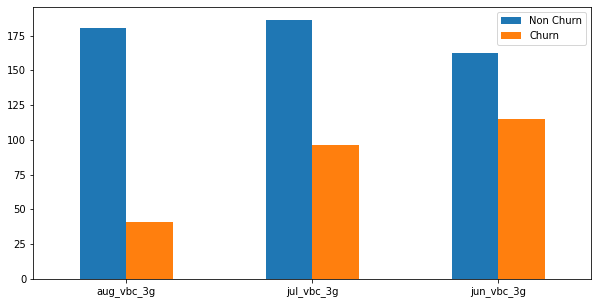

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
target,,,
0,180.501280,186.206078,162.370343
1,40.851975,96.076317,115.096575


In [79]:
vbc_cols = churn_df.filter(regex='vbc').columns
plot_mean_bar_chart(vbc_cols)

- We can see that there is drop for VBC in 8th month for churn users

#### **4. Mobile internet usage volume (in MB)**


- As per data dictionary `VOL is Mobile internet usage volume (in MB)`

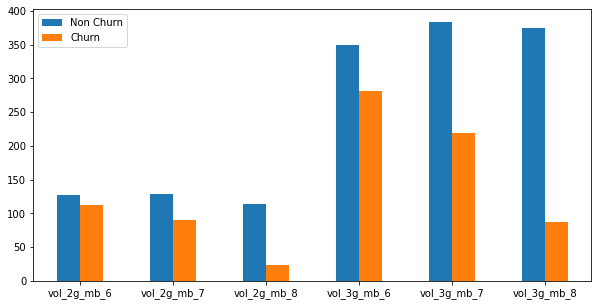

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
target,,,,,,
0,127.830679,128.229264,113.243187,349.825292,383.548331,374.884935
1,111.748697,89.736321,23.152745,281.407722,219.450729,87.399685


In [80]:
vol_cols = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
            'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
plot_mean_bar_chart(vol_cols)

- We can see that there is drop for 2g and 3g mobile internet usage(MB) in 8th month for churn users

### **5. Average recharge amount**

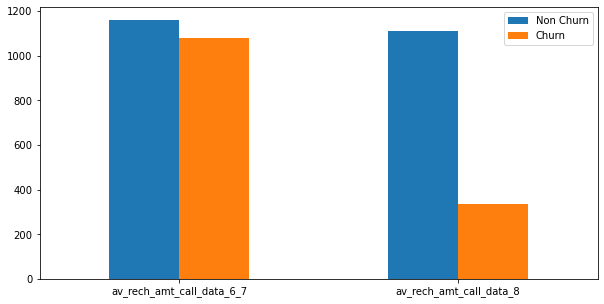

,av_rech_amt_call_data_6_7,av_rech_amt_call_data_8
target,,
0,1159.118200,1110.586829
1,1079.260088,336.676182


In [81]:
avg_rech_call_amt = ['av_rech_amt_call_data_6_7', 'av_rech_amt_call_data_8']
plot_mean_bar_chart(avg_rech_call_amt)

- We can see that there is drop for average recharge amount (call + internet) in 8th month for churn users

### **6. Total Incoming MOU**

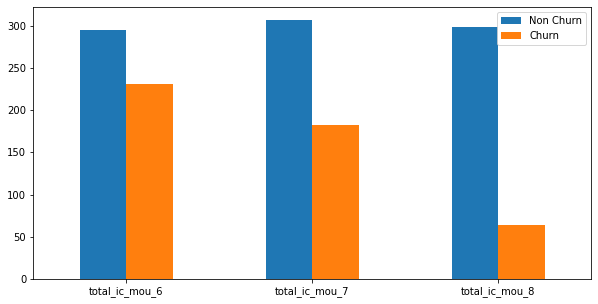

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
target,,,
0,295.131789,306.840677,299.096525
1,231.451344,182.907534,63.444342


In [82]:
total_ic = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
plot_mean_bar_chart(total_ic)

- We can see that there is drop for total incoming mou in 8th month for churn users

### **7. Total Outgoing MOU**

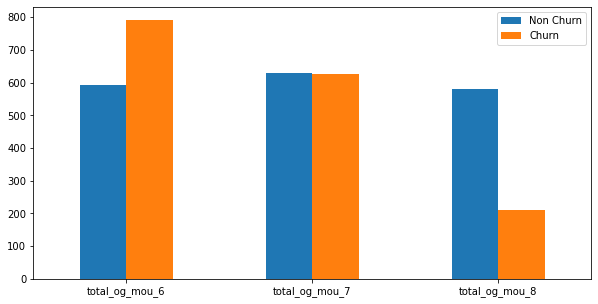

,total_og_mou_6,total_og_mou_7,total_og_mou_8
target,,,
0,593.763075,628.442026,581.998003
1,791.678435,627.508218,209.361368


In [83]:
total_og = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
plot_mean_bar_chart(total_og)

- We can see that there is drop for total outgoing mou in 8th month for churn users

#### **Observations:**

- Total incoming and outgoing MOU is reduced in the month of august
- Average recharge amount reduced in the month of august
- Total data recharge reduced in the month of august
- This Reduction is not just normal but significant.
- Those who churned were customers who used services for less days as compared to customers who didn't churn.
- Overall most of the services that customer was using, reduced to low in action phase 8th month.

## **6. Data Preparation**

In [84]:
 churn_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_call_data_6_7,av_rech_amt_call_data_8,aon_month,last_rech_age_gap_1,last_rech_age_gap_2,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,night_pck_user_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,fb_user_diff,target
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

In [85]:
churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_call_data_6_7,av_rech_amt_call_data_8,aon_month,last_rech_age_gap_1,last_rech_age_gap_2,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,night_pck_user_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,fb_user_diff,target
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,30.40,0.00,101.20,559.0,504.0,32.266667,25.0,23.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.160,4.130,1.150,5.440,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,-1.5,0.0,0.0,0.0,-9.975,-7.555,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0

### **6.1 Spliting the data into train and test sets**

In [86]:
churn_df_copy = churn_df.copy()

In [87]:
y = churn_df_copy.pop("target")
X = churn_df_copy

In [88]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_df.drop(['target'],axis=1)

# Putting response variable to y
y = churn_df['target']

In [89]:
# since our data has class imbalance for target variable, we will use stratify.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

In [90]:
print("Train data size :", X_train.shape)
print("Test  data size :", X_test.shape)

Train data size : (21000, 184)
Test  data size : (9001, 184)


In [91]:
x_train_cols = X_train.columns
x_test_cols = X_test.columns

In [92]:
# checking fo data imbalance
round((y_train.value_counts()/y_train.size) * 100, 3)

0    91.862
1     8.138
Name: target, dtype: float64

### **6.2 Data Scaling**

In [93]:
# initialize the scaler
scaler = StandardScaler()

# transform train data
X_train_sc = scaler.fit_transform(X_train)

# transform test data
X_test_sc = scaler.fit_transform(X_test)

## **7. PCA (High Performance Model)**

In [94]:
def evaluate_model(classifier, X_train, X_test):
    print("Train ROC AUC   :", round(metrics.roc_auc_score(y_train, classifier.predict(X_train)), 2))
    sensitivity, specificity, _ = sensitivity_specificity_support(y_train, classifier.predict(X_train), average='binary') 
    print("Sensitivity\t: ", round(sensitivity, 2), "\n", "Specificity\t: ", round(specificity, 2), sep='')
    accuracy = accuracy_score(y_train, classifier.predict(X_train))
    print("Train Accuracy  :", "{:2.2}".format(accuracy))

    print("-"*50)
    print("Test ROC AUC    :", round(metrics.roc_auc_score(y_test, classifier.predict(X_test)), 2))
    sensitivity_t, specificity_t, _ = sensitivity_specificity_support(y_test, classifier.predict(X_test), average='binary') 
    print("Sensitivity\t: ", round(sensitivity_t, 2), "\n", "Specificity\t: ", round(specificity_t, 2), sep='')
    accuracy = accuracy_score(y_test, classifier.predict(X_test))
    print("Test Accuracy   :", "{:2.2}".format(accuracy))

In [95]:
# Function to plot plot_confusion_matrix
def plot_confusion_matrix(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    print("Accuracy", "{:2.3}".format(accuracy))

    conf_matrix = confusion_matrix(y_actual, y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

In [96]:
# Function to plot top 20 feature_importances
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
    features = features.head(20)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

### **7.1 Components from the PCA**

We will run PCA for feature reduction.

In [97]:
# initialize object
pca = PCA(random_state=42)

In [98]:
# fit the scaled data
pca.fit(X_train_sc)

PCA(random_state=42)

In [99]:
pca.components_

array([[-6.20159774e-02, -5.83848491e-02, -4.30467346e-02, ...,
        -1.66805668e-02,  3.35191425e-04, -2.37952437e-02],
       [ 1.23208164e-01,  1.39604632e-01,  1.58114341e-01, ...,
         2.21580116e-02,  1.25260521e-02,  4.64700354e-02],
       [ 8.77251588e-02,  1.30097205e-01,  1.49067798e-01, ...,
         1.45196554e-02,  2.15424053e-02,  5.50157326e-02],
       ...,
       [-0.00000000e+00,  1.42111800e-15, -1.42638006e-15, ...,
        -4.66285084e-02, -2.75137096e-02, -1.42863468e-04],
       [-0.00000000e+00, -3.43908929e-16,  7.81348922e-16, ...,
         2.46066432e-02, -2.02297146e-03, -4.55639461e-03],
       [ 0.00000000e+00,  3.86084394e-16, -1.67568924e-16, ...,
         2.19165387e-02,  1.53604110e-02, -1.30449321e-02]])

Looking at the explained variance ratio for each component

In [100]:
pca.explained_variance_ratio_

array([8.35988292e-02, 7.02484606e-02, 5.08569205e-02, 4.55750072e-02,
       3.25038006e-02, 3.14967835e-02, 2.95495975e-02, 2.51573593e-02,
       2.17252263e-02, 2.03186383e-02, 2.01394239e-02, 1.91066684e-02,
       1.82652886e-02, 1.68379275e-02, 1.59364427e-02, 1.54268845e-02,
       1.52814838e-02, 1.48717000e-02, 1.45044613e-02, 1.38334259e-02,
       1.33844706e-02, 1.29623971e-02, 1.25592893e-02, 1.22784529e-02,
       1.19042486e-02, 1.14193882e-02, 1.13180074e-02, 1.05818501e-02,
       1.05384771e-02, 1.03784438e-02, 1.00936947e-02, 9.94444808e-03,
       9.61844000e-03, 9.59379288e-03, 8.70802792e-03, 8.45741927e-03,
       8.20634410e-03, 7.79273729e-03, 7.66528277e-03, 7.47392573e-03,
       7.33911728e-03, 7.11696271e-03, 6.99361002e-03, 6.95955021e-03,
       6.72133263e-03, 6.57618932e-03, 6.36144584e-03, 6.32068200e-03,
       6.25372311e-03, 6.21637932e-03, 5.98829990e-03, 5.88454797e-03,
       5.76998745e-03, 5.66574147e-03, 5.59030776e-03, 5.06595337e-03,
      

In [101]:
# calculating the cumulative sum 
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [102]:
for index, i in enumerate(var_cumu):
  print(str(index)+' '+ str(100*np.round(i,2)))

0 8.0
1 15.0
2 20.0
3 25.0
4 28.000000000000004
5 31.0
6 34.0
7 37.0
8 39.0
9 41.0
10 43.0
11 45.0
12 47.0
13 49.0
14 50.0
15 52.0
16 53.0
17 55.00000000000001
18 56.00000000000001
19 57.99999999999999
20 59.0
21 60.0
22 61.0
23 63.0
24 64.0
25 65.0
26 66.0
27 67.0
28 68.0
29 69.0
30 70.0
31 71.0
32 72.0
33 73.0
34 74.0
35 75.0
36 76.0
37 76.0
38 77.0
39 78.0
40 79.0
41 79.0
42 80.0
43 81.0
44 82.0
45 82.0
46 83.0
47 83.0
48 84.0
49 85.0
50 85.0
51 86.0
52 86.0
53 87.0
54 88.0
55 88.0
56 89.0
57 89.0
58 90.0
59 90.0
60 90.0
61 91.0
62 91.0
63 92.0
64 92.0
65 93.0
66 93.0
67 93.0
68 94.0
69 94.0
70 94.0
71 95.0
72 95.0
73 95.0
74 95.0
75 96.0
76 96.0
77 96.0
78 96.0
79 96.0
80 97.0
81 97.0
82 97.0
83 97.0
84 97.0
85 97.0
86 98.0
87 98.0
88 98.0
89 98.0
90 98.0
91 98.0
92 98.0
93 99.0
94 99.0
95 99.0
96 99.0
97 99.0
98 99.0
99 99.0
100 99.0
101 99.0
102 99.0
103 99.0
104 100.0
105 100.0
106 100.0
107 100.0
108 100.0
109 100.0
110 100.0
111 100.0
112 100.0
113 100.0
114 100.0
115 100.0
11

We require **71 variables** to explain 95% variance of the data.

### **7.2 Making a scree plot for the explained variance**

In [103]:
from imblearn.metrics import sensitivity_specificity_support

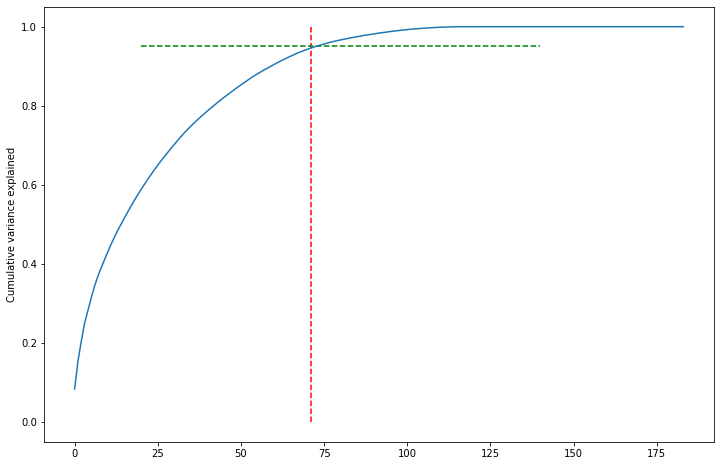

In [104]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=71, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=20, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 71 components

In [105]:
pca_final = IncrementalPCA(n_components=71)

Applying the transformation on the train and test set

In [106]:
# fit the scaled X_train
X_train_pca = pca_final.fit_transform(X_train_sc)
X_train_pca.shape

(21000, 71)

In [107]:
X_test_pca = pca_final.transform(X_test_sc)
X_test_pca.shape

(9001, 71)

**Applying logistic regression on the data on our Principal components**

In [108]:
model_lr = LogisticRegression(class_weight='balanced')
model_lr_pca = model_lr.fit(X_train_pca, y_train)

In [109]:
model_lr_pca.score(X_train_pca, y_train)

0.8280952380952381

In [110]:
y_pred_train = model_lr_pca.predict_proba(X_train_pca)

In [111]:
y_pred_test = model_lr_pca.predict(X_test_pca)

In [112]:
y_pred_pca = model_lr_pca.predict(X_test_pca)  
print(metrics.classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8269
           1       0.29      0.82      0.43       732

    accuracy                           0.82      9001
   macro avg       0.64      0.82      0.66      9001
weighted avg       0.93      0.82      0.86      9001



Model evaluation and confusion matrix

In [113]:
evaluate_model(model_lr_pca, X_train_pca, X_test_pca)

Train ROC AUC   : 0.83
Sensitivity	: 0.84
Specificity	: 0.83
Train Accuracy  : 0.83
--------------------------------------------------
Test ROC AUC    : 0.82
Sensitivity	: 0.82
Specificity	: 0.82
Test Accuracy   : 0.82


Accuracy 0.825


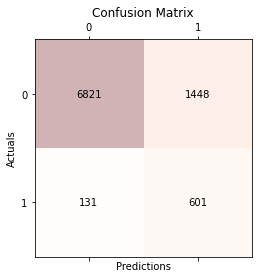

In [114]:
# call function to plot confusion matrix
plot_confusion_matrix(y_test, y_pred_test)

## **8. High Interpretable Model**

### 8.1 Applying Random forest

In [115]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [116]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

Making predictions on the test set

In [117]:
rfc_predictions = rfc.predict(X_test)
rfc_predictions

array([0, 0, 0, ..., 0, 0, 0])

Model evaluation and confusion matrix

In [118]:
evaluate_model(rfc, X_train, X_test)

Train ROC AUC   : 1.0
Sensitivity	: 1.0
Specificity	: 1.0
Train Accuracy  : 1.0
--------------------------------------------------
Test ROC AUC    : 0.71
Sensitivity	: 0.44
Specificity	: 0.99
Test Accuracy   : 0.94


Accuracy 0.942


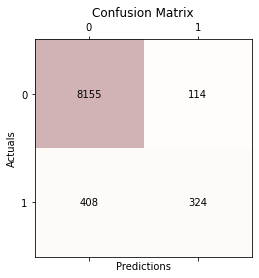

In [119]:
# call function to plot confusion matrix
plot_confusion_matrix(y_test, rfc_predictions)

Applying Random Forest without any paramater tuning overfits the training data and gives low sensitivity. Hence we will perform parameter tuning to increase the sensitivity.

### 8.2 Hyperparameter tunning

In [120]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

In [121]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(100, 400, 100),
    'n_estimators': [200, 300],
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [122]:
estimator = RandomForestClassifier(class_weight='balanced', random_state=42, criterion='entropy')

random_search = RandomizedSearchCV(estimator, param_distributions=param_grid, scoring='recall', cv=folds, verbose=2,
                               random_state=42, return_train_score=True, n_jobs=-1)

In [123]:
%%time
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 2min 12s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': range(100, 400, 100),
                                        'min_samples_split': range(100, 400, 100),
                                        'n_estimators': [200, 300]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=2)

#### Best estimator

In [124]:
# best estimator
rf_best = random_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=300,
                       min_samples_split=300, n_estimators=300,
                       random_state=42)

In [125]:
cv_result_rf = pd.DataFrame(random_search.cv_results_)
cv_result_rf[['mean_train_score', 'mean_test_score']].head()

,mean_train_score,mean_test_score
0,0.851959,0.793439
1,0.823288,0.801043
2,0.823580,0.799873
3,0.823580,0.799871
4,0.833088,0.796361


### 8.3 Final model

In [126]:
rfc_final = RandomForestClassifier(
    class_weight='balanced', criterion='entropy', max_depth=10, max_features='auto',
    min_samples_leaf=300, min_samples_split=300, n_estimators=300,
    n_jobs=-1, random_state=42)

In [127]:
%%time
rfc_final.fit(X_train, y_train)

Wall time: 2.88 s


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=300,
                       min_samples_split=300, n_estimators=300, n_jobs=-1,
                       random_state=42)

#### Making predictions on the test set

In [128]:
rfc_final_pred = rfc_final.predict(X_test)
rfc_final_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Model evaluation and confusion matrix

In [129]:
evaluate_model(rfc_final, X_train, X_test)

Train ROC AUC   : 0.86
Sensitivity	: 0.83
Specificity	: 0.89
Train Accuracy  : 0.89
--------------------------------------------------
Test ROC AUC    : 0.84
Sensitivity	: 0.8
Specificity	: 0.89
Test Accuracy   : 0.88


Accuracy 0.882


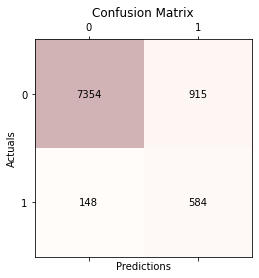

In [130]:
# call function to plot confusion matrix
plot_confusion_matrix(y_test, rfc_final_pred)

### 8.4 Feature Importance

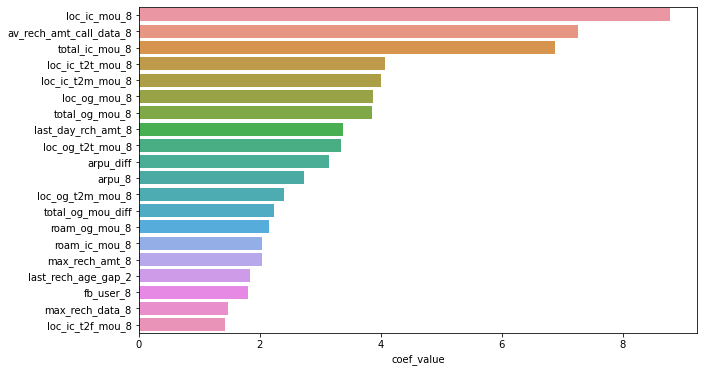

In [131]:
# feature importance for top 20 features
top_featues = plot_feature_importances(rfc_final.feature_importances_*100, x_train_cols)

In [132]:
top_featues.head(15)

,coef_value
loc_ic_mou_8,8.790198
av_rech_amt_call_data_8,7.265496
total_ic_mou_8,6.889105
loc_ic_t2t_mou_8,4.066995
loc_ic_t2m_mou_8,4.011501
loc_og_mou_8,3.869094
total_og_mou_8,3.850907
last_day_rch_amt_8,3.383003
loc_og_t2t_mou_8,3.340630
arpu_diff,3.151577


In [133]:
# get top 15 features list
top_n_featues = top_featues.sort_values(by='coef_value', ascending=False)[:15]
top_featues_list = list(top_n_featues.index)
top_featues_list

['loc_ic_mou_8',
 'av_rech_amt_call_data_8',
 'total_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_mou_8',
 'total_og_mou_8',
 'last_day_rch_amt_8',
 'loc_og_t2t_mou_8',
 'arpu_diff',
 'arpu_8',
 'loc_og_t2m_mou_8',
 'total_og_mou_diff',
 'roam_og_mou_8',
 'roam_ic_mou_8']

In [134]:
# X_train for top features
X_train_top = X_train[top_featues_list]

# X_test for top features
X_test_top = X_test[top_featues_list]

### 8.5 Model on top 15 features

In [135]:
top_feature_model = RandomForestClassifier(
    class_weight='balanced', criterion='entropy', max_depth=10, max_features='auto',
    min_samples_leaf=300, min_samples_split=300, n_estimators=300,
    n_jobs=-1, random_state=42)

In [136]:
%%time
top_feature_model.fit(X_train_top, y_train)

Wall time: 1.31 s


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=300,
                       min_samples_split=300, n_estimators=300, n_jobs=-1,
                       random_state=42)

Making predictions on the test set

In [137]:
top_model_pred = top_feature_model.predict(X_test_top)
top_model_pred

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
evaluate_model(top_feature_model, X_train_top, X_test_top)

Train ROC AUC   : 0.85
Sensitivity	: 0.83
Specificity	: 0.87
Train Accuracy  : 0.87
--------------------------------------------------
Test ROC AUC    : 0.84
Sensitivity	: 0.81
Specificity	: 0.87
Test Accuracy   : 0.86


Accuracy and confusion matrix

Accuracy 0.864


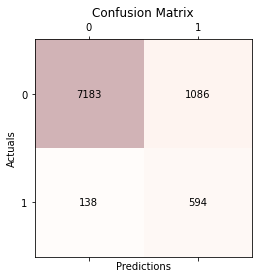

In [139]:
# call function to plot confusion matrix
plot_confusion_matrix(y_test, top_model_pred)

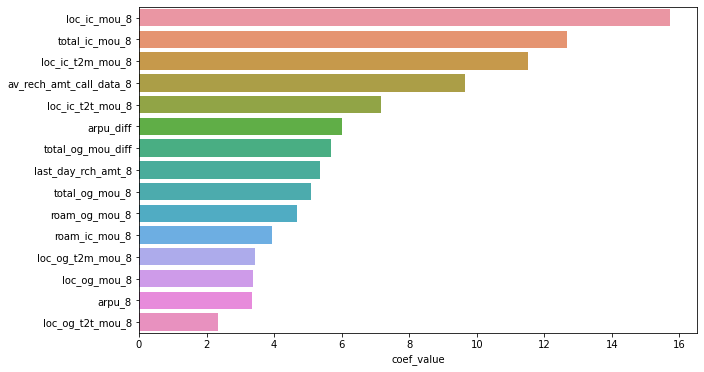

In [144]:
top_15 = plot_feature_importances(top_feature_model.feature_importances_*100, top_n_featues.index)

In [147]:
top_15_ = top_15.sort_values(by='coef_value', ascending=False)[0:15]
top_15_

,coef_value
loc_ic_mou_8,15.730083
total_ic_mou_8,12.683502
loc_ic_t2m_mou_8,11.529257
av_rech_amt_call_data_8,9.639113
loc_ic_t2t_mou_8,7.152392
arpu_diff,6.003313
total_og_mou_diff,5.687578
last_day_rch_amt_8,5.373289
total_og_mou_8,5.088024
roam_og_mou_8,4.687546


### 8. 6 Create logistic regression model on top 15 features.

In [148]:
top_15_list = list(top_15_.index)
top_15_list

['loc_ic_mou_8',
 'total_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'av_rech_amt_call_data_8',
 'loc_ic_t2t_mou_8',
 'arpu_diff',
 'total_og_mou_diff',
 'last_day_rch_amt_8',
 'total_og_mou_8',
 'roam_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'arpu_8',
 'loc_og_t2t_mou_8']

<AxesSubplot:>

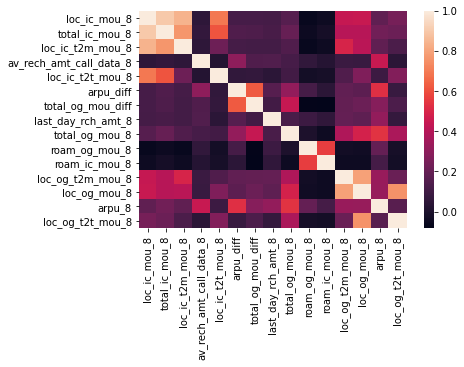

In [149]:
sns.heatmap(X_train[top_15_list].corr())

We will select top 9 best features with low multi-collinearity

In [150]:
best_features = [
    'loc_ic_mou_8', 'av_rech_amt_call_data_8', 'arpu_diff', 'total_og_mou_diff',
    'last_day_rch_amt_8', 'total_og_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'arpu_8'
]

#### Scaling the data

In [151]:
X_train_sc_best = scaler.fit_transform(X_train[best_features])

X_test_sc_best = scaler.fit_transform(X_test[best_features])

We will apply logistic regression with multiple parameters 

In [152]:
lr_final = LogisticRegression(class_weight='balanced', random_state=42)

params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

model_lr_final = GridSearchCV(
    estimator= lr_final,
    param_grid = params,
    cv = 5,
    scoring='recall',
    n_jobs = -1
)

In [153]:
model_lr_final.fit(X_train_sc_best, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [154]:
model_lr_final.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [157]:
logistic_model = model_lr_final.best_estimator_

In [158]:
logistic_model.coef_

array([[-1.73681702, -1.45380187, -0.63878603, -0.23739497, -0.34786856,
        -0.36187259,  0.07796924,  0.20205376,  0.70156713]])

Now that we have the coefficients, we will display them in a more presentable manner

In [159]:
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [160]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train[best_features].columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [161]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1).T
coefficients

,0
intercept,-1.340263
loc_ic_mou_8,-1.736817
av_rech_amt_call_data_8,-1.453802
arpu_diff,-0.638786
total_og_mou_diff,-0.237395
last_day_rch_amt_8,-0.347869
total_og_mou_8,-0.361873
roam_ic_mou_8,0.077969
roam_og_mou_8,0.202054
arpu_8,0.701567


## 9. Observations

- `loc_ic_mou_8` - reduce in the number of minutes of usage in August increase the probability of churning a customer.<br><br>
- `av_rech_amt_call_data_8` - reduce in the average of recharges of call and data in the action phase i.e. August month,  is a strong indicator that the customer is likely to churn. <br><br>
- `arpu_diff` - reduce in the average revenue per user increases the likelyhood of churn. <br><br>
- `total_og_mou_diff` - denotes the difference between previous month and current month of outgoing minutes of call. A drop in minutes of usage means rise in the probability of churn. <br><br>
- `last_day_rch_amt_8` - if the customer doesn't recharge in the action phase, this means he is likely to churn. <br><br>
- `total_og_mou_8` - decrease in outgoing calls means the customer is not happy with the service and hence he is likely to churn. <br><br>
- `roam_ic_mou_8` and `roam_og_mou_8` - increase in the amount of roaming minutes in month of august suggests that the customer has changed his location and hence will likely churn. <br><br>
- `arpu_8` - increase in average revenue per user in month of august means the company is generating more revenue from the user and the user might feel that the recharge amount are getting expensive. Hence he is more likely to churn.

## 10. Recommendations

- Attractive low rates on calls will increase the minutes of usage of user. Thus reducing the likelyhood of churn.
- Give rewards for high usage of service.
- Provide discounts on data and internet recharge packs
- Offer free access or discounted rates on smartphone applications. The increase in regular use by customers seems like an enticing bonus for many customers.
- Send surveys to users who are likely to churn, asking them what caused them to reduce the usage.
- Expanding on services offered and giving better rates or discounts to the client often improves customer retention rates.